# Matplotlib Advanced Customization Problems

**import adjust_text**

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst Data
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

### Job Postings Trend for Cloud Engineers (2.16.1) - Problem


Create a line plot showing the trend of job postings over the months for Cloud Engineer job postings:

- Create a new DataFrame called **df_ce** that filters only job postings that are 'Cloud Engineer'
- Customize the plot by setting the line style to dotted, the line color to purple, and the marker style to 'o'.
- Add a title 'Job Postings Trend for Cloud Engineers' and label the y-axis as 'Count of Job Postings'.

Hint:

Use the DataFrames plot() method to create the line plot and customize the line style, color, and marker style using the linestyle, color, and marker parameters.

In [2]:
df_ce = df[df['job_title_short'] == 'Cloud Engineer'].copy()
df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.to_period('M')

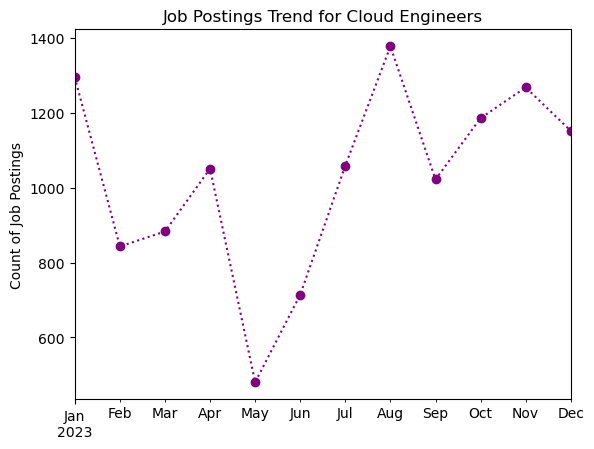

In [3]:
monthly_job_postings = df_ce.groupby('job_posted_month').size()
monthly_job_postings.plot( kind='line', linestyle=':', color='purple', marker='o' )
plt. title('Job Postings Trend for Cloud Engineers')
plt.ylabel( 'Count of Job Postings')
plt.xlabel('')
plt.show()

### Customize Bar Chart (2.16.2) - Problem

Create a bar chart showing the top 5 job companies hiring for Senior Data Analyst roles:

- Create a DataFrame called **SDA_df**. 
- Customize the plot by setting the bar colors to 5 different colors with the variable **colors**.
- Add a grid to the y-axis only and making it dashes.
- Rotate the x-axis labels by 45 degrees.
- Label the y-axis as 'Number of Job Postings' and set the title to 'Top 5 Companies hiring Senior Data Analysts by Number of Postings'; Make the font size 14.

Code Needed

`colors = ['blue', 'orange', 'green', 'red', 'purple']` 

Hint

Use DataFrame method **plot()** to create the bar chart specifying the **color** paramater. Customize the grid using the **plt.grid()** function specifying the parameters of **axis** of 'y' and **linestyle** of '--'.

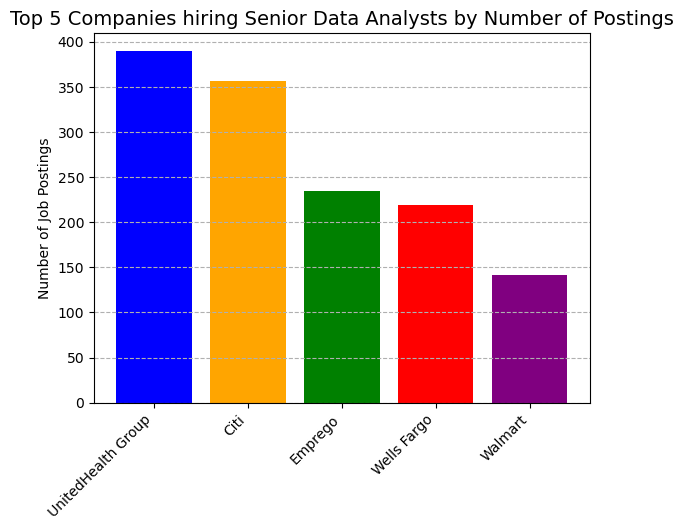

In [4]:
SDA_df = df[df['job_title_short'] == 'Senior Data Analyst'].copy()

# Get the top 5 companies by number of postings
company_counts = SDA_df['company_name'].value_counts().head(5)

# Custom colors
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plot the bar chart
plt.bar(company_counts.index, company_counts.values, color=colors)
plt.xlabel('')
plt.ylabel('Number of Job Postings')
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()